# Project 1
### Data Science
### Filipe Borba & Micah Reid

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf
import thinkplot

In [2]:
df = pd.read_pickle('cleaned_nsduh.pkl')
df.head(2)

,SEX,AGE,PRES_PAINKILLER_USE,REC_PAINKILLER_USE,REC_PAINKILLER_MISUSE,PRES_PAINKILLER_MISUSE,ANY_PAINKILLER_LIFETIME,OXYCONTIN_USE,OXYCONTIN_MISUSED,INCOME,FAMILY_INCOME,EDUCATION,CAIDCHIP_HI,PRIVATE_HI,ANY_HI,HEALTH_INSURANCE
0,Male,65+,Never used,Never,Never misused,Never used,Not used,Not used in past year,Did not misuse - past year,75k+,75k+,College Graduate,Doesn't have Medicaid/CHIP,Has Private HI,With HI,Has Private HI
1,Male,35-49,Used in 12+ months,Never,Never misused,Used in 12+ months,Used,Not used in past year,Did not misuse - past year,30-40k,30-40k,College Graduate,Has Medicaid/CHIP,Doesn't have Private HI,With HI,Has Medicaid/CHIP


## Exploring Crosstabs

#### Health Insurance and Painkiller use

In [3]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'], 
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Health Insurance,,,
Has Medicaid/CHIP,32.189,12.900,54.911
Has Private HI,29.004,28.656,42.340
Has any other HI,34.198,23.449,42.352
Without any HI,28.177,19.232,52.591
All,46.272,23.676,30.052


In [4]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["OXYCONTIN_USE"], 
                 rownames=['Health Insurance'], colnames=['Used Oxycontin'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Oxycontin,Used in past year,Not used in past year
Health Insurance,,
Has Medicaid/CHIP,3.613,96.387
Has Private HI,2.900,97.100
Has any other HI,3.978,96.022
Without any HI,3.877,96.123
All,96.762,3.238


In [5]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["OXYCONTIN_MISUSED"],
                 rownames=['Health Insurance'], colnames=['Misused Prescription Painkillers'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Prescription Painkillers,Misused - past year,Did not misuse - past year
Health Insurance,,
Has Medicaid/CHIP,0.933,99.067
Has Private HI,0.588,99.412
Has any other HI,0.519,99.481
Without any HI,1.532,98.468
All,99.247,0.753


In [6]:
ct = pd.crosstab(df["ANY_HI"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Any Health Insurance,,,
With HI,30.246,24.137,45.617
Without HI,28.177,19.232,52.591
All,46.272,23.676,30.052


In [7]:
ct = pd.crosstab(df["ANY_HI"], df["OXYCONTIN_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Oxycontin Use'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Oxycontin Use,Used in past year,Not used in past year
Any Health Insurance,,
With HI,3.171,96.829
Without HI,3.877,96.123
All,96.762,3.238


In [8]:
ct = pd.crosstab(df["ANY_HI"], df["OXYCONTIN_MISUSED"],
                 rownames=['Any Health Insurance'], colnames=['Misused Oxycontin'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Oxycontin,Misused - past year,Did not misuse - past year
Any Health Insurance,,
With HI,0.673,99.327
Without HI,1.532,98.468
All,99.247,0.753


#### Filtering by: Used any painkiller

In [9]:
used_pk = df[df.PRES_PAINKILLER_USE != "Never used"]

In [10]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["PRES_PAINKILLER_USE"],
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months
Health Insurance,,
Has Medicaid/CHIP,71.390,28.610
Has Private HI,50.301,49.699
Has any other HI,59.323,40.677
Without any HI,59.434,40.566
All,44.067,55.933


In [11]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["OXYCONTIN_USE"],
                 rownames=['Health Insurance'], colnames=['Used Oxycontin'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Oxycontin,Used in past year,Not used in past year
Health Insurance,,
Has Medicaid/CHIP,8.012,91.988
Has Private HI,5.030,94.970
Has any other HI,6.901,93.099
Without any HI,8.177,91.823
All,93.974,6.026


In [12]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["OXYCONTIN_MISUSED"],
                 rownames=['Health Insurance'], colnames=['Misused Oxycontin'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Oxycontin,Misused - past year,Did not misuse - past year
Health Insurance,,
Has Medicaid/CHIP,2.070,97.930
Has Private HI,1.020,98.980
Has any other HI,0.900,99.100
Without any HI,3.231,96.769
All,98.598,1.402


#### Filtering by: Without any Health Insurance

In [13]:
no_hi = df[df.HEALTH_INSURANCE == "Without any HI"]

In [14]:
ct = pd.crosstab(no_hi["HEALTH_INSURANCE"], no_hi["PRES_PAINKILLER_USE"],
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Health Insurance,,,
Without any HI,28.177,19.232,52.591
All,52.591,19.232,28.177


In [15]:
ct = pd.crosstab(no_hi["HEALTH_INSURANCE"], no_hi["OXYCONTIN_USE"],
                 rownames=['Health Insurance'], colnames=['Used Oxycontin'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Oxycontin,Used in past year,Not used in past year
Health Insurance,,
Without any HI,3.877,96.123
All,96.123,3.877


In [16]:
ct = pd.crosstab(no_hi["HEALTH_INSURANCE"], no_hi["OXYCONTIN_MISUSED"],
                 rownames=['Health Insurance'], colnames=['Misused Oxycontin'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Oxycontin,Misused - past year,Did not misuse - past year
Health Insurance,,
Without any HI,1.532,98.468
All,98.468,1.532


## Explorimg PMFs

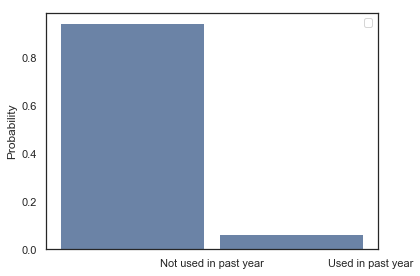

In [27]:
pmf_a = Pmf(used_pk["OXYCONTIN_USE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

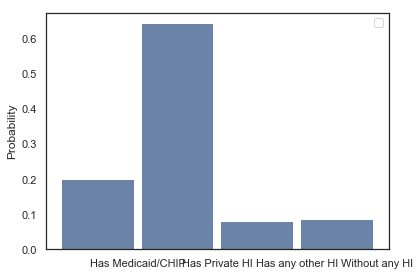

In [22]:
pmf_a = Pmf(used_pk["HEALTH_INSURANCE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

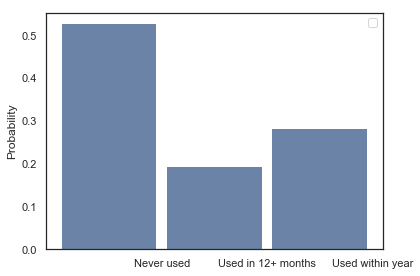

In [24]:
pmf_a = Pmf(no_hi["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

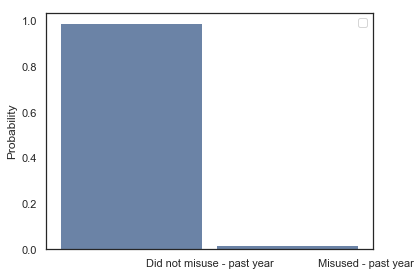

In [25]:
pmf_a = Pmf(used_pk["OXYCONTIN_MISUSED"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

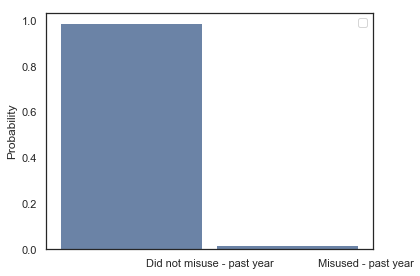

In [29]:
pmf_a = Pmf(no_hi["OXYCONTIN_MISUSED"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

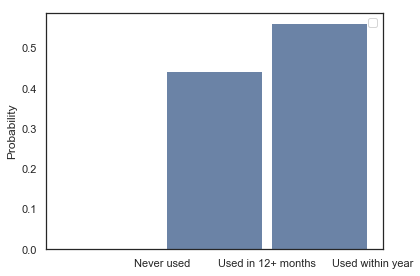

In [31]:
pmf_a = Pmf(used_pk["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')

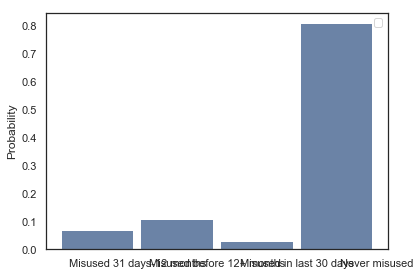

In [32]:
pmf_a = Pmf(used_pk["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')